In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(columns=df[['CustomerID','Genre', 'Age']], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [7]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
X=df

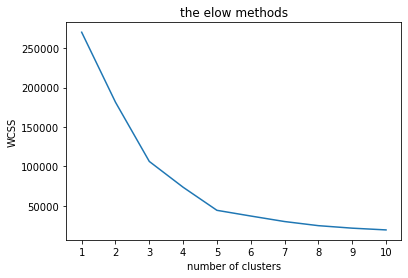

In [14]:
# how to identify optimal number of clusters
from sklearn.cluster import KMeans

l=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    l.append(kmeans.inertia_)
    
plt.plot(range(1,11),l)
plt.xticks(range(1,11))
plt.title('the elow methods')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=10)
y_kmeans=kmeans.fit_predict(X)


In [28]:
df['cluster']=pd.DataFrame(y_kmeans)

df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


In [29]:
df[df['cluster']==4]

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [30]:
#visulaizing cluster

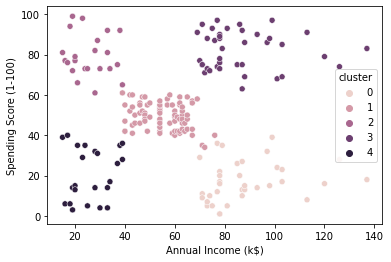

In [33]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['cluster'])
plt.show()